# Importing the packages and data

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from texttable import Texttable
import latextable

In [4]:
import sys
sys.path.insert(1, '../sar_dirichlet')
import dirichlet_regression

In [5]:
from func_test import cos_similarity, rmse_aitchison

In [6]:
scipy.__version__

'1.10.1'

# Loading Dataset

In [7]:
Y_occitanie = pd.read_csv('Data Dirichlet/occitanie/Y_occitanie.csv', sep=';')

In [8]:
X_occitanie = pd.read_csv('Data Dirichlet/occitanie/X_occitanie.csv', sep=';')

In [9]:
X_occitanie = X_occitanie.iloc[:,1:]
X_occitanie = X_occitanie.iloc[:,:-1]

In [10]:
coordinates = pd.read_csv('Data Dirichlet/occitanie/coordinates_cendroids.csv', sep=';')
distance_matrix = scipy.spatial.distance_matrix(coordinates,coordinates)

In [11]:
X_occitanie

,POP,age_mineur,age_1824,age_2540,age_4055,age_5564,age_65,PIMP13,MED13,NBMENFISC13,...,P14_RP,no_diplom,capbep,bac,diplom_sup,french,foreign,unemp_rate,employ_evol,owner_rate
0,10686.00000,1745.432828,633.702526,1519.569182,2022.546303,1637.837488,3126.911673,1534.935651,17225.92056,3281.000000,...,5500.369754,3084.717115,2060.336850,1491.085449,1959.678274,10175.94126,510.058743,0.146153,-1.069783,0.613769
1,13248.00000,2609.587595,629.992708,1880.992367,2713.380702,2161.124558,3252.922069,1114.436913,16809.71966,2669.000000,...,6097.677242,3744.620133,2624.381082,1815.069962,2178.892325,12472.42430,775.575696,0.149798,-1.986204,0.700856
2,13304.00000,3212.791456,779.945838,2402.657503,2871.416012,1518.065046,2519.124145,1621.879453,18847.56366,3449.000000,...,5584.441924,3092.683829,2659.588509,1821.080501,2154.021975,12857.59935,446.400655,0.119585,0.215514,0.657686
3,15448.38045,3236.015033,1332.042735,2472.243775,3062.868917,1930.683069,3414.526923,3381.464244,17087.33333,7263.674412,...,7430.553567,3988.595203,2507.078388,2172.484668,2919.694058,14257.99939,1190.381062,0.184913,-0.684689,0.463652
4,20618.51872,4469.611276,1502.609556,3212.323704,4271.437340,2738.220953,4424.315890,3596.385003,18267.50694,7329.416378,...,9505.163850,4785.628253,3539.881007,2999.019653,4096.806972,19392.86290,1225.655818,0.161466,-0.649563,0.562317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,14631.00000,3195.583294,757.466782,2371.208971,3139.218175,2098.865160,3068.657619,606.473438,18890.51048,1281.000000,...,6181.909232,4025.455333,3042.238466,1944.329025,2108.219105,14187.17388,443.826118,0.105342,-0.239769,0.752094
203,13558.00000,2588.237464,577.301835,1746.944956,2768.136801,2158.324794,3719.054149,422.444210,17457.72775,951.000000,...,6112.864148,3769.506710,2844.033122,1912.696566,2222.628774,12573.17884,984.821162,0.118216,0.014046,0.755715
204,18862.00000,4648.579189,977.759331,3311.970574,4315.356878,2403.994498,3204.339530,697.987952,19849.47189,1413.000000,...,7438.455341,4130.059689,3772.243391,2526.645881,3347.924377,18149.95052,712.049477,0.110703,0.979463,0.768029
205,13364.00000,2627.010920,834.264654,1990.070382,2757.346600,1930.498564,3224.808880,1009.300645,17756.25360,2328.000000,...,5959.795988,4304.060809,2769.575874,1609.658404,1751.410833,12536.14180,827.858196,0.141431,0.630300,0.647832


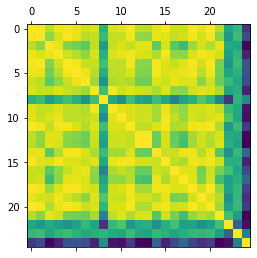

In [12]:
plt.matshow(X_occitanie.corr())

In [62]:
#subset_X = X_occitanie[['POP','MED13','foreign','unemp_rate','employ_evol','owner_rate']]
#subset_X = X_occitanie[['POP','MED13','unemp_rate','employ_evol','owner_rate']]
subset_X = X_occitanie[['POP']]

In [63]:
subset_X.corr()

,POP
POP,1.0


# Performing the Dirichlet regression

In [72]:
X = np.array(subset_X)
#X = np.array(X_occitanie)
Y = np.array(Y_occitanie)

In [73]:
#X = np.ones((207,1))

In [74]:
Z = np.ones((207,1))
gamma_0 = [0.]

In [75]:
X = StandardScaler().fit(X).transform(X)
#X = MinMaxScaler().fit(X).transform(X)

In [77]:
n,K = X.shape
J = Y.shape[1]

In [78]:
K*J

3

## Without spatial

In [20]:
%%time
dirichRegressor = dirichlet_regression.dirichletRegressor()
dirichRegressor.fit(X, Y, parametrization='alternative', gamma_0=gamma_0, Z=Z)

Optimization terminated successfully.
Wall time: 0 ns


In [21]:
loglik_ns = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor.mu,dirichRegressor.phi,Y)
print(loglik_ns)

373.07914926188727


In [22]:
print('R2:',r2_score(Y,dirichRegressor.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor.mu,dirichRegressor.phi,Y)+2*53)
print('Cos similarity:',cos_similarity(Y,dirichRegressor.mu))
print('RMSE_A:', rmse_aitchison(Y,dirichRegressor.mu))

R2: 0.040856805916369865
RMSE: 0.10796861520539862
Cross-entropy: -1.0704391784202776
AIC: -640.1582985237745
Cos similarity: 0.9568602279806472
RMSE_A: 0.5247410647257927


In [23]:
dirichRegressor.inference(X, Y, Z, display=True)

-----
Estimated parameter beta_11 = -0.39, se = 0.04, CI 95% = [-0.47 ; -0.32],  p-value = 0.0
-----
Estimated parameter beta_12 = -0.48, se = 0.04, CI 95% = [-0.56 ; -0.4],  p-value = 0.0
-----
Estimated parameter beta_21 = -0.09, se = 0.04, CI 95% = [-0.17 ; -0.01],  p-value = 0.03
-----
Estimated parameter beta_22 = 0.05, se = 0.04, CI 95% = [-0.02 ; 0.13],  p-value = 0.15
-----
Estimated parameter gamma_1 = 2.84, se = 0.07, CI 95% = [2.71 ; 2.97],  p-value = 0.0


## With spatial

### Distance

In [24]:
W = np.copy(distance_matrix)
W[W > 35000] = 0

In [25]:
# inverse distance
W[W>0] = 1/W[W>0]

# row-normalize
W = W/W.sum(axis=1)[:,None]

In [26]:
np.mean([np.sum(W[i]!=0) for i in range(207)])

12.096618357487923

In [79]:
%%time
dirichRegressor_s1 = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s1.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Wall time: 1.1 s


In [80]:
dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s1.mu,dirichRegressor_s1.phi,Y)

380.92618051842464

In [81]:
print('R2:',r2_score(Y,dirichRegressor_s1.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s1.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s1.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s1.mu,dirichRegressor_s1.phi,Y)+2*53)
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s1.mu))
print('RMSE_A:', rmse_aitchison(Y,dirichRegressor_s1.mu))

R2: 0.09009405587830495
RMSE: 0.1055197126703495
Cross-entropy: -1.067902926980702
AIC: -655.8523610368493
Cos similarity: 0.9585884306999651
RMSE_A: 0.5088634035672974


In [82]:
dirichRegressor_s1.inference(X, Y, Z, W, display=True)

-----
Estimated parameter beta_11 = -0.0, se = 0.06, CI 95% = [-0.13 ; 0.12],  p-value = 0.99
-----
Estimated parameter beta_12 = -0.02, se = 0.06, CI 95% = [-0.14 ; 0.1],  p-value = 0.73
-----
Estimated parameter beta_21 = -0.02, se = 0.15, CI 95% = [-0.31 ; 0.27],  p-value = 0.89
-----
Estimated parameter beta_22 = 0.02, se = 0.15, CI 95% = [-0.26 ; 0.31],  p-value = 0.88
-----
Estimated parameter gamma_1 = 2.88, se = 0.07, CI 95% = [2.75 ; 3.01],  p-value = 0.0
-----
Estimated parameter rho = 0.97, se = nan, CI 95% = [nan ; nan],  p-value = nan


../sar_dirichlet\dirichlet_regression.py:771: RuntimeWarning: invalid value encountered in sqrt
  self.se = np.sqrt(np.diag(self.cov))


In [83]:
dirichRegressor_s1.hess

array([[-8.37927519e+02,  3.27526211e+02, -2.76097366e+02,
         1.12979827e+02, -1.31436060e+01,  3.03056435e+05],
       [ 3.27526211e+02, -7.99834197e+02,  1.12979827e+02,
        -2.86650917e+02, -2.17631943e+01,  3.47083877e+05],
       [-2.76097366e+02,  1.12979827e+02, -1.38927207e+02,
         6.08288341e+01, -3.65030146e+00,  1.44359699e+05],
       [ 1.12979827e+02, -2.86650917e+02,  6.08288341e+01,
        -1.57821509e+02, -1.36522103e+01,  1.37953202e+05],
       [-1.31436060e+01, -2.17631943e+01, -3.65030146e+00,
        -1.36522103e+01, -2.23272452e+02,  6.64739235e+02],
       [ 3.03056435e+05,  3.47083877e+05,  1.44359699e+05,
         1.37953202e+05,  6.64739235e+02, -3.05348058e+05]])

In [58]:
np.linalg.cond(dirichRegressor_s1.hess)

39.26958778710748

In [44]:
temp_hess = np.copy(dirichRegressor_s1.hess)
temp_hess[temp_hess > 1e3] = 1e3

In [45]:
np.linalg.cond(temp_hess)

94.39026242843276

In [41]:
np.linalg.inv(-temp_hess)

array([[ 6.22003673e-04, -2.87870029e-04, -4.59690351e-04,
        -2.81112651e-04, -1.76060891e-04, -4.20546509e-05],
       [-2.87870029e-04,  6.90853917e-04, -6.04104415e-04,
        -3.48764789e-04, -7.33297956e-05, -4.32059176e-05],
       [-4.59690351e-04, -6.04104415e-04,  1.35622386e-03,
         5.06507612e-04,  2.17010087e-04, -2.52252607e-05],
       [-2.81112651e-04, -3.48764789e-04,  5.06507612e-04,
         1.41804388e-03,  9.16452142e-05, -1.16063414e-05],
       [-1.76060891e-04, -7.33297956e-05,  2.17010087e-04,
         9.16452142e-05,  4.81851436e-03,  4.45133218e-06],
       [-4.20546509e-05, -4.32059176e-05, -2.52252607e-05,
        -1.16063414e-05,  4.45133218e-06, -1.93426805e-06]])

In [34]:
np.diag(dirichRegressor_s1.cov)

array([ 8.14125777e-04,  3.37229356e-04,  1.53357133e-03,  1.46227674e-03,
        4.81461832e-03, -9.44182199e-07])

In [32]:
loglik_s1 = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s1.mu,dirichRegressor_s1.phi,Y)

In [33]:
# LR ratio test
LR_statistic = -2*(loglik_ns-loglik_s1)
p_value = scipy.stats.chi2.sf(LR_statistic, 1)
print(p_value)

2.768256691294034e-10


### Contiguity

In [34]:
W_occitanie = pd.read_csv('Data Dirichlet/occitanie/W_elections_5nn.csv', sep=' ', header=None)

In [35]:
W_occitanie_10 = pd.read_csv('Data Dirichlet/occitanie/W_elections_10nn.csv', sep=' ', header=None)

In [36]:
W = np.array(W_occitanie)

In [37]:
%%time
dirichRegressor_s2 = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s2.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z)

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Wall time: 1.32 s


In [38]:
print('R2:',r2_score(Y,dirichRegressor_s2.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s2.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s2.mu)))
print('AIC:',-2*dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s2.mu,dirichRegressor_s2.phi,Y)+2*54)
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s2.mu))
print('RMSE_A:', rmse_aitchison(Y,dirichRegressor_s2.mu))

R2: 0.31111996552160576
RMSE: 0.09242673374802564
Cross-entropy: -1.0579196006305505
AIC: -741.0760469653447
Cos similarity: 0.9667868915258631
RMSE_A: 0.4451744340067145


In [39]:
dirichRegressor_s2.inference(X, Y, Z, W, display=True)

-----
Estimated parameter beta_11 = -0.15, se = 0.03, CI 95% = [-0.21 ; -0.1],  p-value = 0.0
-----
Estimated parameter beta_12 = -0.18, se = 0.01, CI 95% = [-0.21 ; -0.15],  p-value = 0.0
-----
Estimated parameter beta_21 = -0.05, se = 0.05, CI 95% = [-0.14 ; 0.05],  p-value = 0.34
-----
Estimated parameter beta_22 = 0.1, se = 0.05, CI 95% = [0.0 ; 0.2],  p-value = 0.05
-----
Estimated parameter beta_31 = -0.08, se = 0.05, CI 95% = [-0.18 ; 0.01],  p-value = 0.09
-----
Estimated parameter beta_32 = -0.01, se = 0.05, CI 95% = [-0.11 ; 0.09],  p-value = 0.87
-----
Estimated parameter beta_41 = -0.08, se = 0.06, CI 95% = [-0.2 ; 0.04],  p-value = 0.19
-----
Estimated parameter beta_42 = 0.18, se = 0.06, CI 95% = [0.06 ; 0.3],  p-value = 0.0
-----
Estimated parameter beta_51 = 0.01, se = 0.04, CI 95% = [-0.07 ; 0.08],  p-value = 0.87
-----
Estimated parameter beta_52 = 0.03, se = 0.04, CI 95% = [-0.05 ; 0.12],  p-value = 0.41
-----
Estimated parameter beta_61 = -0.06, se = 0.05, CI 95% = 

../sar_dirichlet\dirichlet_regression.py:771: RuntimeWarning: invalid value encountered in sqrt
  self.se = np.sqrt(np.diag(self.cov))


In [40]:
loglik_s2 = dirichlet_regression.dirichlet_loglikelihood(dirichRegressor_s2.mu,dirichRegressor_s2.phi,Y)

In [41]:
# LR ratio test
LR_statistic = -2*(loglik_ns-loglik_s2)
p_value = scipy.stats.chi2.sf(LR_statistic, 1)
print(p_value)

5.937601122594649e-05


#### Cross-entropy

In [53]:
%%time
dirichRegressor_s2_ce = dirichlet_regression.dirichletRegressor(spatial=True, maxiter=5000, maxfun=500000)
dirichRegressor_s2_ce.fit(X, Y, W=W, parametrization='alternative', gamma_0=gamma_0, Z=Z, loss='crossentropy')

Optimization terminated successfully.
Wall time: 7.29 s


In [54]:
print('R2:',r2_score(Y,dirichRegressor_s2_ce.mu))
print('RMSE:',mean_squared_error(Y,dirichRegressor_s2_ce.mu,squared=False))
print('Cross-entropy:',1/n*np.sum(Y*np.log(dirichRegressor_s2_ce.mu)))
print('Cos similarity:',cos_similarity(Y,dirichRegressor_s2_ce.mu))
print('RMSE_A:', rmse_aitchison(Y,dirichRegressor_s2_ce.mu))

R2: 0.36770415511423
RMSE: 0.08853130760137184
Cross-entropy: -1.0548941511086538
Cos similarity: 0.9691416515763004
RMSE_A: 0.433819681616588


# Inference tests

In [65]:
import scipy.stats as st
from scipy.optimize import minimize

In [66]:
def compute_cov(model, Z=Z, W=W):
    model.compute_hessian(X, Y, Z=Z, W=W)
    
    H = model.hess   # H should be the Hessian of the log-likelihood (matrix of second derivatives)
    # Observed information (per PDF): Iobs = - H
    Iobs = -H

    # invert Iobs to get approximate covariance matrix (robustify numerically)
    #cov = np.linalg.inv(Iobs)
    cov = np.linalg.pinv(Iobs)

    model.cov_matrix = cov*n
    

def wald_test(model, Z):
    model.compute_hessian(X, Y, Z=Z, W=W)

    H = model.hess   # H should be the Hessian of the log-likelihood (matrix of second derivatives)
    # Observed information (per PDF): Iobs = - H
    Iobs = -H

    # invert Iobs to get approximate covariance matrix (robustify numerically)
    #cov = np.linalg.inv(Iobs)
    cov = np.linalg.pinv(Iobs)

    model.cov_matrix = cov*n
    
    rho_index = model.hess.shape[0] - 1

    rho_hat = model.rho
    se_rho = np.sqrt(np.abs(model.cov_matrix[rho_index, rho_index]))  # sqrt of Var estimate

    # Wald (Z) test for H0: rho = 0
    Z = (rho_hat - 0.0) / se_rho
    pval_wald_rho = 2 * (1 - st.norm.cdf(abs(Z)))

    # Wald 95% CI
    zcrit = 1.96
    ci_wald_rho = (rho_hat - zcrit*se_rho, rho_hat + zcrit*se_rho)

    print(f"rho_hat = {rho_hat:.6f}, se = {se_rho:.6f}")
    print(f"Wald Z = {Z:.3f}, p-value (two-sided) = {pval_wald_rho:.6g}")
    print(f"Wald 95% CI for rho: {ci_wald_rho}")

In [68]:
wald_test(dirichRegressor_s1, Z)

rho_hat = 0.956177, se = 0.000326
Wald Z = 2935.202, p-value (two-sided) = 0
Wald 95% CI for rho: (0.9555381914005172, 0.9568151775752827)


In [69]:
wald_test(dirichRegressor_s2, Z)

rho_hat = 0.600788, se = 0.140386
Wald Z = 4.280, p-value (two-sided) = 1.87274e-05
Wald 95% CI for rho: (0.3256317496777579, 0.8759444639231646)


In [62]:
wald_test(dirichRegressor_s1, Z)

rho_hat = 0.964802, se = 0.000022
Wald Z = 44498.340, p-value (two-sided) = 0
Wald 95% CI for rho: (0.9647599659480826, 0.9648449568965707)


In [63]:
wald_test(dirichRegressor_s2, Z)

rho_hat = 0.912230, se = 0.000244
Wald Z = 3742.735, p-value (two-sided) = 0
Wald 95% CI for rho: (0.9117524670822885, 0.9127078850203434)


In [70]:
def univariate_wald_test_beta(model, i, j):
    index = i*(J-1)+j
    beta_ij = model.beta.flatten()[index]
    var_beta_ij = model.cov_matrix[index, index]
    
    se_ij = np.sqrt(var_beta_ij)
    z_stat = beta_ij / se_ij
    p_value = 2 * (1 - st.norm.cdf(abs(z_stat)))

    return {
        "beta_ij": beta_ij,
        "se": se_ij,
        "z": z_stat,
        "p_value": p_value
    }

In [71]:
result = univariate_wald_test_beta(dirichRegressor_s1, i=2, j=0)
print(f"β[2,0] = {result['beta_ij']:.4f} ± {result['se']:.4f}, "
      f"z = {result['z']:.3f}, p = {result['p_value']:.4g}")

β[2,0] = -0.0338 ± 0.4478, z = -0.076, p = 0.9398


In [161]:
compute_cov(dirichRegressor, Z=Z, W=None)

In [106]:
compute_cov(dirichRegressor, Z=Z, W=None)

In [162]:
np.diag(dirichRegressor.cov_matrix)

array([ 2.21621962e+14,  2.21621962e+14,  2.21621962e+14, -1.17470404e+14,
       -1.17470404e+14, -1.17470404e+14,  9.31479268e-01])

In [163]:
dirichRegressor.hess

array([[-948.76843863,  492.84394399,  455.92449464,   -3.10155867,
         -27.39683654,   30.49839521,   35.25603355],
       [ 492.84394399, -810.48078551,  317.63684152,  -27.39683654,
          37.15026879,   -9.75343225,  -13.21960487],
       [ 455.92449464,  317.63684152, -773.56133616,   30.49839521,
          -9.75343225,  -20.74496296,  -22.03642868],
       [  -3.10155867,  -27.39683654,   30.49839521, -940.79348396,
         409.16059188,  531.63289208,    1.61455302],
       [ -27.39683654,   37.15026879,   -9.75343225,  409.16059188,
        -744.82054842,  335.65995654,   -7.91411591],
       [  30.49839521,   -9.75343225,  -20.74496296,  531.63289208,
         335.65995654, -867.29284862,    6.29956289],
       [  35.25603355,  -13.21960487,  -22.03642868,    1.61455302,
          -7.91411591,    6.29956289, -223.70413325]])

In [132]:
result = univariate_wald_test_beta(dirichRegressor, i=1, j=1)
print(f"β[1,1] = {result['beta_ij']:.4f} ± {result['se']:.4f}, "
      f"z = {result['z']:.3f}, p = {result['p_value']:.4g}")

β[1,1] = -0.5889 ± 284400.2845, z = -0.000, p = 1


In [110]:
np.diag(dirichRegressor.cov_matrix)

array([-5.04899379e+14, -4.91171604e+14, -4.98464734e+14, -1.28758104e+13,
       -3.06309450e+13, -7.57676465e+13,  2.70478397e+13,  2.02764469e+13,
       -2.74299217e+12, -8.06867664e+13, -8.92804719e+13, -1.41366533e+14,
        2.54414531e+12,  4.81270029e+11, -1.66156521e+12, -1.09154368e+13,
       -1.70354470e+13, -4.59917132e+13, -1.26809371e+13, -1.47314508e+13,
       -2.71701700e+13, -2.78628753e+12, -5.64178391e+12, -1.80650212e+13,
       -3.99869867e+13, -3.99869867e+13, -3.89429400e+13,  1.77666892e+14,
        1.78319505e+14,  1.77298023e+14,  1.47695592e+12,  1.36098753e+12,
        1.45726317e+12, -1.53924552e+13, -1.51643690e+13, -1.50136062e+13,
        1.27995736e+13,  1.28521386e+13,  1.27995736e+13,  5.46920161e+12,
        5.40485806e+12,  5.41228231e+12, -4.01468496e+13, -4.01242724e+13,
       -4.01423342e+13, -1.76895262e+13, -1.76945483e+13, -1.76737271e+13,
       -1.98252061e+13, -1.98704175e+13, -1.99156290e+13, -1.37169190e+13,
       -1.36852611e+13, -

In [109]:
np.diag(dirichRegressor_s1.cov_matrix)

array([ 1.03483447e+12,  9.05480164e+11,  1.16418878e+12,  1.89807919e+11,
        1.49971058e+11, -1.13073962e+12,  1.59608940e+11,  4.33150406e+11,
        4.06130643e+11,  1.88987888e+11,  7.82201989e+10,  2.46096773e+11,
        5.98201541e+10, -2.32840913e+10, -8.85816072e+10, -4.73401972e+10,
       -5.19611089e+10, -3.41904005e+11, -8.66803241e+10, -1.73786333e+11,
       -1.30656769e+11,  2.69043687e+10, -1.36473528e+11,  1.44338873e+11,
        7.73094197e+10,  7.78820834e+10,  7.67367490e+10,  1.39522420e+11,
        1.38428309e+11,  1.39225613e+11,  1.53978891e+11,  1.55751027e+11,
        1.52994365e+11,  1.93519442e+10,  1.93531127e+10,  2.00852893e+10,
        4.29723640e+10,  4.23477653e+10,  4.33471224e+10,  4.86756252e+11,
        4.84790536e+11,  4.86949596e+11,  1.32438832e+11,  1.31934031e+11,
        1.32103888e+11, -1.19340988e+11, -1.18602174e+11, -1.19139385e+11,
        1.48361755e+11,  1.47980488e+11,  1.48075795e+11,  5.09945046e+11,
        5.09577913e+11,  

In [107]:
dirichRegressor_s1.cov_matrix[4,4]

149971057668.18716

In [ ]:
dirichRegressor

In [73]:
def multivariate_wald_test(model):
    p_beta = model.K * (model.J - 1) 
    beta_vec = model.beta.flatten()[:p_beta]

    # covariance submatrix for beta block from cov
    cov_beta = model.cov_matrix[:p_beta, :p_beta]

    # Wald statistic: beta' * cov_beta^{-1} * beta
    try:
        inv_cov_beta = np.linalg.inv(cov_beta)
    except np.linalg.LinAlgError:
        inv_cov_beta = np.linalg.pinv(cov_beta)

    W_beta = beta_vec.T @ inv_cov_beta @ beta_vec
    df_beta = len(beta_vec)
    pval_wald_beta = 1 - st.chi2.cdf(W_beta, df=df_beta)

    print(f"Multivariate Wald for β=0: statistic = {W_beta:.3f}, df = {df_beta}, p-value = {pval_wald_beta:.4g}")